In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/TechLabs/SocialWifi
#von "Für mich freigegeben" eine Verknüpfung herstellen zum eigenen Drive Ordner, ggf. Ordnerstruktur anpassen

/content/drive/.shortcut-targets-by-id/1LCyAiUrS5pFcFM0Egbk0En9E1bV42sjm/SocialWifi


In [ ]:
# Pakete installieren
!pip install geopandas
!pip install geoplot
!pip install cartopy
!pip install pandas
!pip install folium

!pip install streamlit
!pip install leafmap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.9/474.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 19.4 MB/

In [ ]:
# Pakete laden

import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import folium
from folium.plugins import Geocoder


In [ ]:
# Daten einlesen (Datei mit Geodaten)
data = gpd.read_file("data/K-2021-AI-S-01--AI1601--2024-06-04.geojson")

# Übersicht über die Daten
print(type(data))
data.head()

# ai1601 bezeichnet das verfügbare Einkommen je EW 2021,
#   d.h. der Betrag, der den privaten Haushalten für Konsumzwecke oder zur Ersparnisbildung zur Verfügung steht. Es ergibt sich dadurch, dass dem Primäreinkommen die monetären Sozialleistungen
#  (Rente, Arbeitslosenhilfe, Kindergeld etc.) sowie die sonstigen laufenden Transfers hinzugefügt werden und die Sozialbeiträge und die sonstigen laufenden Transfers sowie Einkommensteuern und
#  andere Steuern, die von den privaten Haushalten zu leisten sind, abgezogen werden. Das Primäreinkommen der privaten Haushalte enthält die Einkommen aus Erwerbstätigkeit und Vermögen, die den
#  inländischen privaten Haushalten zugeflossen sind (z. B. Selbstständigen- einkommen, Arbeitnehmerentgelt).


# schluessel ist der Gleiche Index wie beim Breitbandatlas

<class 'geopandas.geodataframe.GeoDataFrame'>


,id,schluessel,gen,jahr,ai1601,geometry
0,476918,03361,Verden,2021,24984,"POLYGON ((511892.592 5892281.709, 512069.839 5..."
1,476875,01001,Flensburg,2021,20282,"POLYGON ((526513.753 6075133.412, 526479.083 6..."
2,476876,01002,Kiel,2021,21320,"POLYGON ((575841.570 6032148.032, 575797.258 6..."
3,476877,01003,Lübeck,2021,22419,"POLYGON ((623056.151 5983746.445, 622950.350 5..."
4,476878,01004,Neumünster,2021,21167,"POLYGON ((565015.652 6000637.513, 564788.455 6..."


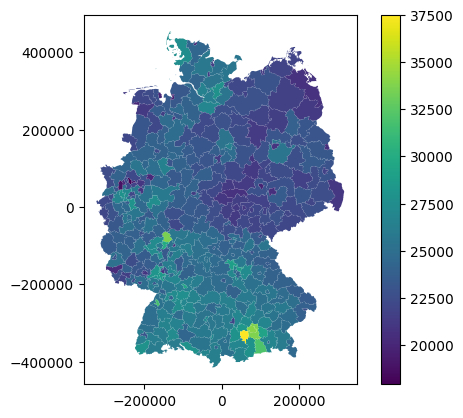

In [ ]:
# erster Plot - eingefärbt nach verfügbarem Einkommen
data = data.to_crs('EPSG:4839')

data.plot(
    column = "ai1601",
    legend = True
    )

plt.savefig('plot.png')

In [ ]:
# Excel mit Daten aus dem Breitbandatlas einlesen
dataB = pd.read_excel("data/Breitband.xlsx")

# Überblick über die ersten Zeilen der Daten
print(type(dataB))
dataB.head()

<class 'pandas.core.frame.DataFrame'>


,AGS,Name,Verwaltungsebene,Land,Kreis,Raumkategorie,≥ 16 Mbit/s,≥ 30 Mbit/s,≥ 50 Mbit/s,≥ 100 Mbit/s,...,≥ 1000 Mbit/s14,≥ 16 Mbit/s15,≥ 30 Mbit/s16,≥ 50 Mbit/s17,≥ 100 Mbit/s18,≥ 200 Mbit/s19,2G,4G,5G DSS,5G
0,0,Bundesrepublik Deutschland,1 - Bund,NaN,NaN,NaN,98.78,96.10,95.91,92.90,...,61.94,96.43,17.67,17.22,16.73,14.77,99.99,99.87,93.66,96.69
1,1,Land Schleswig-Holstein,2 - Land,Land Schleswig-Holstein,NaN,NaN,98.31,95.60,95.60,94.67,...,66.70,93.87,0.00,0.00,0.00,0.00,100.00,100.00,94.24,96.93
2,2,Freie und Hansestadt Hamburg,2 - Land,Freie und Hansestadt Hamburg,NaN,NaN,99.01,98.52,98.52,98.07,...,86.67,95.71,0.00,0.00,0.00,0.00,100.00,100.00,99.62,99.96
3,3,Land Niedersachsen,2 - Land,Land Niedersachsen,NaN,NaN,98.62,95.62,95.45,91.35,...,62.79,95.51,0.00,0.00,0.00,0.00,100.00,99.93,92.99,96.38
4,4,Freie Hansestadt Bremen,2 - Land,Freie Hansestadt Bremen,NaN,NaN,98.54,98.06,98.06,97.80,...,92.94,97.35,0.00,0.00,0.00,0.00,100.00,100.00,99.63,99.98


In [ ]:
# gemeinsames Dataframe aus Geodaten (data) und Breitbandatlas (dataB) erstellen
df = pd.DataFrame(dataB)
print(df.dtypes)

df2 = pd.DataFrame(data)
print(df2.dtypes)

# Variable "schluessel" in Integer umwandeln, damit der Datentyp in beiden Datensätzen gleich ist
data['schluessel'] = data["schluessel"].astype(int)

AGS                   int64
Name                 object
Verwaltungsebene     object
Land                 object
Kreis                object
Raumkategorie        object
≥ 16 Mbit/s         float64
≥ 30 Mbit/s         float64
≥ 50 Mbit/s         float64
≥ 100 Mbit/s        float64
≥ 200 Mbit/s        float64
≥ 400 Mbit/s        float64
≥ 1000 Mbit/s       float64
≥ 1000 Mbit/s2      float64
≥ 16 Mbit/s3        float64
≥ 30 Mbit/s4        float64
≥ 50 Mbit/s5        float64
≥ 100 Mbit/s6       float64
≥ 200 Mbit/s7       float64
≥ 16 Mbit/s8        float64
≥ 30 Mbit/s9        float64
≥ 50 Mbit/s10       float64
≥ 100 Mbit/s11      float64
≥ 200 Mbit/s12      float64
≥ 400 Mbit/s13      float64
≥ 1000 Mbit/s14     float64
≥ 16 Mbit/s15       float64
≥ 30 Mbit/s16       float64
≥ 50 Mbit/s17       float64
≥ 100 Mbit/s18      float64
≥ 200 Mbit/s19      float64
2G                  float64
4G                  float64
5G DSS              float64
5G                  float64
dtype: object
id    

In [ ]:
# Datensätze anhand des Schlüssels/Index mergen
fullData = data.merge(
    dataB,
    left_on=['schluessel'],  # identifier from geodataframe
    right_on=['AGS']  # identifier from dataframe
)
# Übersicht über die ersten 10 Zeilen
fullData.head(10)

,id,schluessel,gen,jahr,ai1601,geometry,AGS,Name,Verwaltungsebene,Land,...,≥ 1000 Mbit/s14,≥ 16 Mbit/s15,≥ 30 Mbit/s16,≥ 50 Mbit/s17,≥ 100 Mbit/s18,≥ 200 Mbit/s19,2G,4G,5G DSS,5G
0,476918,3361,Verden,2021,24984,"POLYGON ((511892.592 5892281.709, 512069.839 5...",3361,Landkreis Verden,3 - Kreis,Land Niedersachsen,...,60.32,96.10,0.0,0.0,0.0,0.0,100.0,100.00,96.28,98.90
1,476875,1001,Flensburg,2021,20282,"POLYGON ((526513.753 6075133.412, 526479.083 6...",1001,Kreisfreie Stadt Flensburg,3 - Kreis,Land Schleswig-Holstein,...,90.77,94.30,0.0,0.0,0.0,0.0,100.0,100.00,100.00,100.00
2,476876,1002,Kiel,2021,21320,"POLYGON ((575841.570 6032148.032, 575797.258 6...",1002,Kreisfreie Stadt Kiel,3 - Kreis,Land Schleswig-Holstein,...,92.54,98.99,0.0,0.0,0.0,0.0,100.0,100.00,99.76,100.00
3,476877,1003,Lübeck,2021,22419,"POLYGON ((623056.151 5983746.445, 622950.350 5...",1003,Kreisfreie Stadt Lübeck,3 - Kreis,Land Schleswig-Holstein,...,88.92,97.78,0.0,0.0,0.0,0.0,100.0,100.00,99.68,99.99
4,476878,1004,Neumünster,2021,21167,"POLYGON ((565015.652 6000637.513, 564788.455 6...",1004,Kreisfreie Stadt Neumünster,3 - Kreis,Land Schleswig-Holstein,...,92.80,98.56,0.0,0.0,0.0,0.0,100.0,100.00,99.73,99.88
5,476879,1051,Dithmarschen,2021,24682,"MULTIPOLYGON (((505053.385 6023856.559, 504935...",1051,Kreis Dithmarschen,3 - Kreis,Land Schleswig-Holstein,...,40.48,95.91,0.0,0.0,0.0,0.0,100.0,100.00,89.13,88.78
6,476880,1053,Herzogtum Lauenburg,2021,25507,"MULTIPOLYGON (((614093.131 5965725.984, 614022...",1053,Kreis Herzogtum Lauenburg,3 - Kreis,Land Schleswig-Holstein,...,65.80,90.81,0.0,0.0,0.0,0.0,100.0,100.00,91.67,95.28
7,476881,1054,Nordfriesland,2021,27534,"MULTIPOLYGON (((464810.713 6100447.129, 464735...",1054,Kreis Nordfriesland,3 - Kreis,Land Schleswig-Holstein,...,42.80,89.84,0.0,0.0,0.0,0.0,100.0,99.98,89.11,94.14
8,476882,1055,Ostholstein,2021,25622,"MULTIPOLYGON (((637021.867 6029305.755, 636978...",1055,Kreis Ostholstein,3 - Kreis,Land Schleswig-Holstein,...,60.43,94.15,0.0,0.0,0.0,0.0,100.0,100.00,96.33,97.16
9,476883,1056,Pinneberg,2021,26563,"MULTIPOLYGON (((549382.638 5971882.841, 548786...",1056,Kreis Pinneberg,3 - Kreis,Land Schleswig-Holstein,...,77.51,95.31,0.0,0.0,0.0,0.0,100.0,100.00,97.63,98.36


<Axes: >

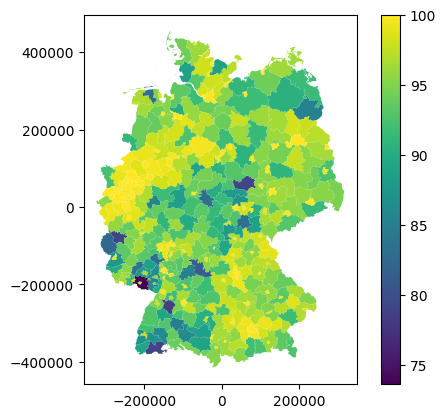

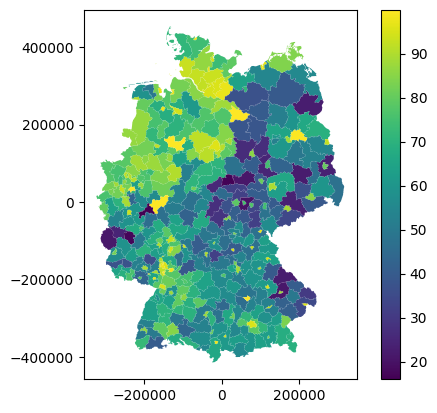

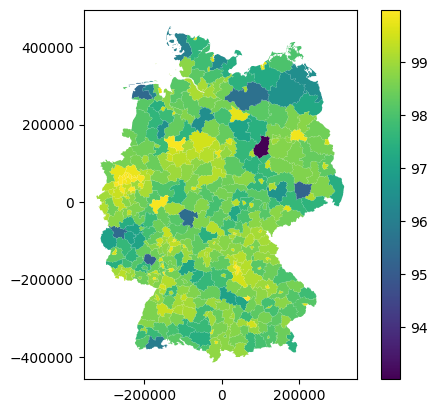

In [ ]:
# Daten plotten mit Farbskala nach Internetgeschwindigkeit - Einkommensverteilung ist nicht abgebildet
fullData = fullData.to_crs('EPSG:4839')

fullData.plot(
    column = "5G",
    legend = True
    )

fullData.plot(
    column = "≥ 1000 Mbit/s",
    legend = True
    )

fullData.plot(
    column = "≥ 16 Mbit/s",
    legend = True
    )

# Was ist für Homeoffice z.B. relevant an Internetgeschwindigkeit?
# Empfehlung von vodafone ist 250 Mbit/s für zuverlässiges Homeoffice

In [ ]:
# letzten 6 Zeilen des Datensatzes anzeigen
dataB['schluessel'] = dataB['AGS']

dataB.tail(6)

,AGS,Name,Verwaltungsebene,Land,Kreis,Raumkategorie,≥ 16 Mbit/s,≥ 30 Mbit/s,≥ 50 Mbit/s,≥ 100 Mbit/s,...,≥ 16 Mbit/s15,≥ 30 Mbit/s16,≥ 50 Mbit/s17,≥ 100 Mbit/s18,≥ 200 Mbit/s19,2G,4G,5G DSS,5G,schluessel
11445,16077043,Stadt Schmölln,4 - Gemeinde,Freistaat Thüringen,Landkreis Altenburger Land,2 - halbstädtisch,98.51,92.20,92.20,88.76,...,97.31,0.0,0.0,0.0,0.0,100.0,100.0,86.74,88.68,16077043
11446,16077044,Gemeinde Starkenberg,4 - Gemeinde,Freistaat Thüringen,Landkreis Altenburger Land,3 - ländlich,95.43,72.08,72.08,58.72,...,95.19,0.0,0.0,0.0,0.0,100.0,100.0,24.31,97.35,16077044
11447,16077047,Gemeinde Thonhausen,4 - Gemeinde,Freistaat Thüringen,Landkreis Altenburger Land,3 - ländlich,96.05,85.96,85.96,60.09,...,78.51,0.0,0.0,0.0,0.0,100.0,100.0,98.68,100.00,16077047
11448,16077048,Gemeinde Treben,4 - Gemeinde,Freistaat Thüringen,Landkreis Altenburger Land,2 - halbstädtisch,85.51,62.14,62.14,18.66,...,73.37,0.0,0.0,0.0,0.0,100.0,100.0,63.22,93.30,16077048
11449,16077049,Gemeinde Vollmershain,4 - Gemeinde,Freistaat Thüringen,Landkreis Altenburger Land,3 - ländlich,97.52,46.28,46.28,13.22,...,97.52,0.0,0.0,0.0,0.0,100.0,100.0,75.21,100.00,16077049
11450,16077052,Gemeinde Windischleuba,4 - Gemeinde,Freistaat Thüringen,Landkreis Altenburger Land,3 - ländlich,89.63,81.51,81.51,66.07,...,89.63,0.0,0.0,0.0,0.0,100.0,100.0,40.59,96.84,16077052


In [ ]:
!pip install branca
import branca as branca

In [ ]:
# Für Farbschattierungen der Kreise

from branca.colormap import linear

# Kleinster und größter Wert in der Spalte 'ai1601'
min_value = min(fullData['ai1601'])
max_value = max(fullData['ai1601'])

print(max_value)
print(min_value)

# Erstelle eine lineare Farbabstufung
colormap = linear.RdYlGn_11.scale(min_value, max_value)


# Kleinster und größter Wert in der Spalte '≥ 1000 Mbit/s'
min_value_bb = min(fullData['≥ 1000 Mbit/s'])
max_value_bb = max(fullData['≥ 1000 Mbit/s'])

# Erstelle eine lineare Farbabstufung
colormap_bb = linear.RdYlGn_11.scale(min_value_bb, max_value_bb)


37515
17924


In [ ]:
# Vorschlag für interaktive Karte, in der man zoomen kann

# Erstelle eine Basis-Karte
# Mittelpunkt auf die durchschnittliche Koordinate des Geodaten-Satzes
map_center = [51.1657, 10.4515]
mymap = folium.Map(location=map_center, zoom_start=7, name = 'Karte')

# Füge die Geodaten zur Karte hinzu
folium.GeoJson(fullData,
               name = 'Kreisebene').add_to(mymap)

# Karte nach Einkommen
folium.GeoJson(
    fullData, #Datensatz
    style_function=lambda x: {
        'fillColor': '#0CAC1F' if x['properties']['ai1601'] > 25936
                      else '#92D050' if x['properties']['ai1601'] > 24606
                      else '#FFC000' if x['properties']['ai1601'] > 23440
                      else '#F1623B' if x['properties']['ai1601'] > 22208
                      else '#C82808',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    },
    # Info-Feld als Überlagerung ergänzen
    highlight_function=lambda x: {'weight': 3},
    tooltip=folium.GeoJsonTooltip(
        fields=['gen', 'ai1601', '≥ 1000 Mbit/s'], #Variablen, die angezeigt werden sollen
        aliases=['Kreis', 'Verfügbares Einkommen: ', 'Prozent von ≥ 1000 Mbit/s'], #Namen der Variablen bzw. Daten, die angezeigt werden
        labels=True,
        sticky=False
    ),
    marker = folium.CircleMarker(radius = 5),
    name = 'Verfügbares Einkommen pro Haushalt'
).add_to(mymap)

# Karte nach Breitbandverfügbarkeit
folium.GeoJson(
    fullData,
    style_function=lambda x: {
        'fillColor': colormap_bb(x['properties']['≥ 1000 Mbit/s']),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.6
    },
    highlight_function=lambda x: {'weight': 3},
    tooltip=folium.GeoJsonTooltip(
        fields=['gen', 'ai1601', '≥ 1000 Mbit/s'],
        aliases=['Kreis', 'Verfügbares Einkommen: ', 'Prozent von ≥ 1000 Mbit/s'],
        labels=True,
        sticky=False
    ),
    name = 'Breitbandverfügbarkeit ≥ 1000 Mbit/s'
).add_to(mymap)


Geocoder(position = 'topleft').add_to(mymap)


# Speichere die Karte als HTML-Datei
mymap.save('mymap.html')

# Zeige die Karte
#mymap

In [ ]:
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>

  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>


<div id='maplegend' class='maplegend'
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>

<div class='legend-title'>Legende für verfügbares Einkommen in Euro <br>(verschiebbar!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#0CAC1F;opacity:0.7;'></span>25936 bis 37515</li>
    <li><span style='background:#92D050;opacity:0.7;'></span>24606 bis 25935</li>
    <li><span style='background:#FFC000;opacity:0.7;'></span>23440 bis 24605</li>
    <li><span style='background:#F1623B;opacity:0.7;'></span>22208 bis 23439</li>
    <li><span style='background:#C82808;opacity:0.7;'></span>17924 bis 22207</li>

  </ul>
</div>
</div>

</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

mymap.get_root().add_child(macro)

In [ ]:
# Farbbalken hinzufügen


legend_breitband = branca.colormap.LinearColormap(
        ["red", "yellow", "green"],
        vmin=fullData["≥ 1000 Mbit/s"].min(),
        vmax=fullData["≥ 1000 Mbit/s"].max(),
        caption = "Breitbandverfügbarkeit in Prozent (> 1000 Mbit/s)"
        )

layer = folium.map.LayerControl(position="bottomleft")
mymap.add_child(layer)
mymap.add_child(legend_breitband)
#legende.add_to(mymap)

# Farbbalken positionieren (klappt noch nicht)
#legende.add_to(mymap, "bottomright")

# Speichere die Karte als HTML-Datei
mymap.save('mymap21.html')



In [ ]:
# löscht die "alte" Karte zum Testen neuer Funktionen

dir()

del layer
del mymap
del legend_breitband